ЛАБОРАТОРНАЯ РАБОТА 1.2

Импортируем необходимые библиотеки

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import random


Задаём число обусловленности, размерность матрицы и решение СЛАУ

In [2]:

cond=float(input('Задайте число обусловленности: '))
n=int(input('Задайте размерность матрицы: '))
result_x=np.random.sample(n).reshape(-1, 1)

Задаём элементы на главной диагонали, создаём треугольную матрицу

In [3]:
lambda1=1
lambda2=cond
lambda_n=random.uniform(1,cond)
u=np.full(n-2,lambda_n)
v=np.concatenate((np.array([lambda1,cond]),u))
D=np.diag(v)
T=np.tri(n)
G=np.diag(np.ones(n))
B=T+D-G

Cоздаём ортогональную матрицу

In [4]:
E=np.eye(n)
w=np.random.sample(n)
Q=E-2*w*w.reshape(-1, 1)/np.linalg.norm(w)**2


Создаём матрицу и вычисляем правую часть СЛАУ по известной матрице

In [5]:
A=np.dot(np.linalg.inv(Q),B)
A=np.dot(A, Q)
b=np.dot(A,result_x)

Задаём возмущение правой части

In [6]:
k=random.randint(0,n-1)
delta_b=2*(0.5-random.random())*b[k]*0.02
b[k]=b[k]+delta_b

Найдем обратную матрицу с помощью метода Жордана

In [7]:
E=np.eye(n)
def Iordan(matrix):
    composite_matrix=np.hstack([matrix,E])
    j=0
    while j!=n-1:
        composite_matrix[j,j:]=composite_matrix[j,j:]/composite_matrix[j,j]
        i=0
        while i!=n:
            if i==j:
                i+=1
            composite_matrix[i,j:]=composite_matrix[i,j:]-composite_matrix[j,j:]*composite_matrix[i,j]
            i+=1
        j+=1
    j=n-1
    i=n-2
    composite_matrix[j,j:]=composite_matrix[j,j:]/composite_matrix[j,j]
    while i!=-1:
        composite_matrix[i,j:]=composite_matrix[i,j:]-composite_matrix[j,j:]*composite_matrix[i,j]
        i-=1
    return composite_matrix[0:,n:]



Найдем численное решение СЛАУ

In [8]:
num_x=np.dot(Iordan(A),b)

Вычислим число обусловленности матрицы

In [9]:
cond_A=np.linalg.norm(A,2)*np.linalg.norm(Iordan(A),2)

Проверим выполнение неравенства

In [10]:
np.linalg.norm(result_x-num_x,2)/np.linalg.norm(result_x,2)

np.float64(0.02221942291999882)

In [11]:
cond_A*np.linalg.norm(delta_b,2)/np.linalg.norm(b-delta_b,2)

np.float64(0.12647915875979338)

In [12]:
cond_A*np.linalg.norm(delta_b,2)/np.linalg.norm(b-delta_b,2)>=np.linalg.norm(result_x-num_x,2)/np.linalg.norm(result_x,2)

np.True_

Построим графики зависимости нормы ошибки и нормы невязки от числа обусловленности матрицы.

Сначала создадим необходимые массивы

In [13]:
many_matrix=[]
many_conds=[]
many_b=[]
many_results_x=[]

Далее создаём много матриц одного размера с разными числами обсуловленности, заполняем созданные ранее массивы

In [14]:
i=0
cond=1
while cond!=10**20:
    result_x=np.random.sample(n).reshape(-1, 1)
    lambda1=1
    lambda2=cond
    lambda_n=random.uniform(1,cond)
    u=np.full(n-2,lambda_n)
    v=np.concatenate((np.array([lambda1,cond]),u))
    D=np.diag(v)
    T=np.tri(n)
    G=np.diag(np.ones(n))
    B=T+D-G
    E=np.eye(n)
    w=np.random.sample(n)
    Q=E-2*w*w.reshape(-1, 1)/np.linalg.norm(w)**2
    A=np.dot(np.linalg.inv(Q),B)
    A=np.dot(A, Q)
    b=np.dot(A,result_x)
    many_conds.append(cond)
    many_matrix.append(A)
    many_results_x.append(result_x)
    many_b.append(b)
    i+=1
    cond=10**i

Создаём массивы для построения графиков

In [15]:
f=list(range(0,20))
many_num_x=[np.dot(Iordan(many_matrix[i]),many_b[i]) for i in f]
many_errors=[np.linalg.norm(many_num_x[i]-many_results_x[i],2) for i in f]
many_nevazka=[np.linalg.norm(np.dot(many_matrix[i],many_num_x[i])-many_b[i],2) for i in f]


Строим графики

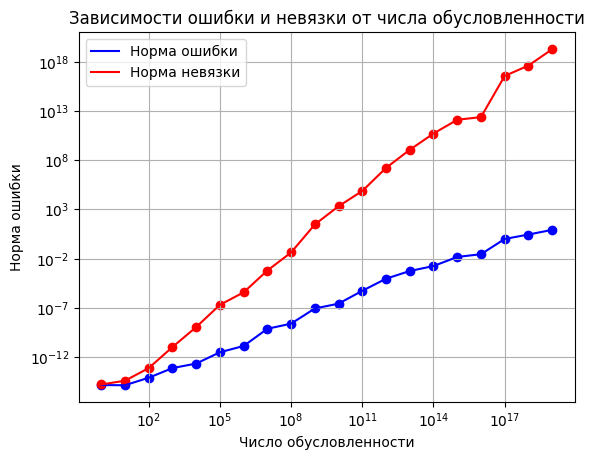

In [ ]:
plt.loglog(many_conds,many_errors,color='blue',label='Норма ошибки')
plt.scatter(many_conds,many_errors,color='blue')
plt.loglog(many_conds,many_nevazka,color='red',label='Норма невязки')
plt.scatter(many_conds,many_nevazka,color='red')
plt.legend()
plt.xlabel('Число обусловленности')
plt.ylabel('Норма ошибки')
plt.title('Зависимости ошибки и невязки от числа обусловленности')
plt.grid('True')
plt.show()

Построим график зависимости относительной ошибки от относительного возмущения правой части

Создадим необходимые массивы

In [17]:
many_b_disturbance=[]
many_disturbance=[]

Зададим число обусловленности наших матриц

In [18]:
cond=10

Создадим много матриц одинаковой размерности с заданным числом обусловленности

In [19]:
i=0
result_x=np.random.sample(n).reshape(-1, 1)
lambda1=1
lambda2=cond
lambda_n=random.uniform(1,cond)
u=np.full(n-2,lambda_n)
v=np.concatenate((np.array([lambda1,cond]),u))
D=np.diag(v)
T=np.tri(n)
G=np.diag(np.ones(n))
B=T+D-G
E=np.eye(n)
w=np.random.sample(n)
Q=E-2*w*w.reshape(-1, 1)/np.linalg.norm(w)**2
A=np.dot(np.linalg.inv(Q),B)
A=np.dot(A, Q)
b=np.dot(A,result_x)
while i!=20:
    delta_b=np.zeros(n).reshape(-1,1)
    k=0
    while k!=n-1:
        delta_b[k]=delta_b[k]+2*(0.5-random.random())*b[k]*0.02
        k+=1
    b=b+delta_b
    many_disturbance.append(delta_b)
    i+=1
    many_b_disturbance.append(b)

Создадим массивы, необходимые для построения графика

In [20]:
many_num_results=[np.dot(Iordan(A),many_b_disturbance[i]) for i in f]
many_errors=[np.linalg.norm(many_num_results[i]-result_x,2) for i in f]
many_relative_disturbance=[np.linalg.norm(many_disturbance[i],2)/np.linalg.norm(b,2) for i in f]
many_relative_errors=[many_errors[i]/np.linalg.norm(result_x,2) for i in f]

Строим график

Text(0, 0.5, 'Относительная ошибка')

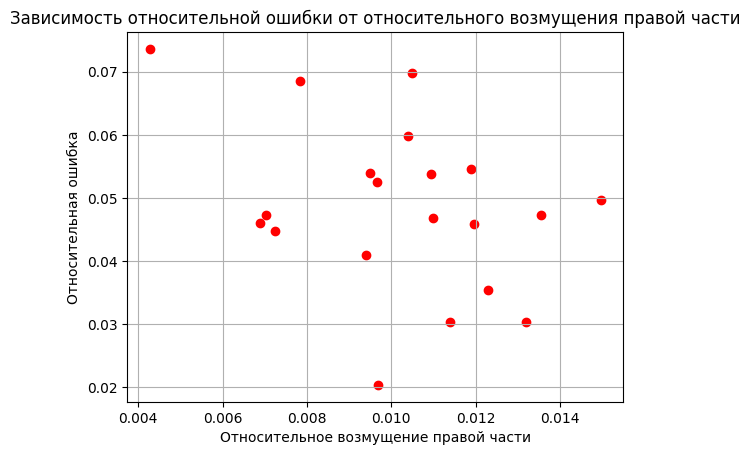

In [21]:
plt.scatter(many_relative_disturbance,many_relative_errors,color='red')
plt.title('Зависимость относительной ошибки от относительного возмущения правой части')
plt.grid(True)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Относительное возмущение правой части')
plt.ylabel('Относительная ошибка')